# Box Plots vs Violin Plots

There are many scenarios in which we want to visualize multiple distributions at the same time.

A very common approach is using **box plots**. Box plots were invented by the statistician John Tukey in the early 1970s, and they quickly gained popularity because they were easy to draw by hand and while simple they were informative.

However, they present several pitfalls, and it is my opinion that, unless your audience has a demand for them, other chart types should be used instead.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Pitfall #1: Box plots hide the underlying distribution

Summarizing also means losing information. Using box plots, we cannot see the underlying distribution of data points in each group, and we are misled when groups have the same box plot but a completely different distribution.

The box plot below conveys the two distributions have the same median and interquartile range. Unfortunately, box plots cannot differentiate between the shapes of the bimodal and uniform distributions. Instead, The violin plot for the bimodal distribution clearly shows the twin peaks of the known distribution.

### Creating Synthetic Data

In [2]:
N = 5000
uniform_dist = np.random.uniform(low = -10, high = 10, size = N)
bimodal_dist = np.concatenate([(np.random.normal(5, 1.5, size = int(N/2))), 
                               np.random.normal(-5, 1.5, size = int(N/2))
                              ])

# Create a dataframe from synthetic distributions
df = pd.DataFrame({'Value': np.concatenate([uniform_dist, bimodal_dist])})
df['synthetic_dis'] = np.nan
df['synthetic_dis'][:N] = 'Uniform'
df['synthetic_dis'][N:2*N] = 'Bimodal'

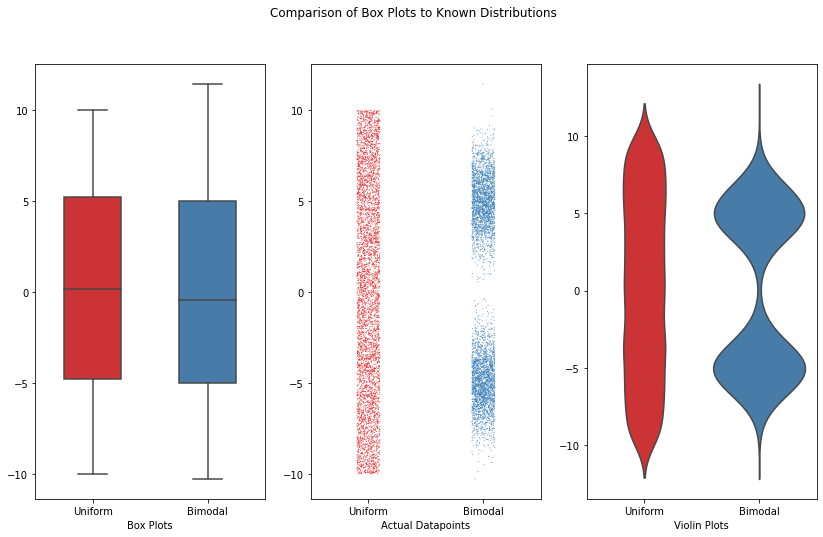

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(14,8))

sns.boxplot(data=df, x="synthetic_dis", y="Value", ax = ax[0], width = 0.5, palette="Set1")
sns.stripplot(data=df, x="synthetic_dis", y="Value", ax = ax[1], jitter = True, size = 1, alpha = 0.8, palette="Set1")
sns.violinplot(data=df, x="synthetic_dis", y="Value", ax = ax[2], inner = None, palette="Set1")

# Remove axis labels
for ax_i, label in zip(ax.flatten(), ['Box Plots', 'Actual Datapoints', 'Violin Plots']):
    ax_i.set_xlabel(label)
    ax_i.set_ylabel('')    

fig.suptitle('Comparison of Box Plots to Known Distributions');

### A better version of box plots

A better version of a box plots chart is shown below. At least, it provides the data points, so the audience can see past the summary statistics, and get insights on the number of data points and rough distribution/

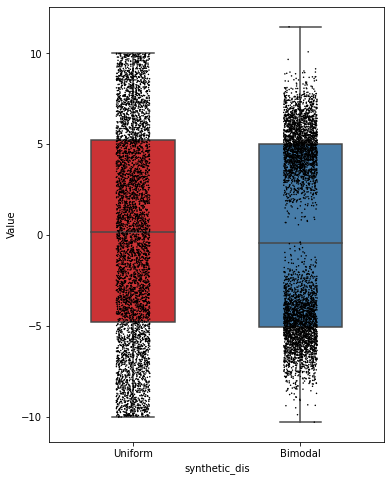

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,8))
sns.boxplot(data=df, x="synthetic_dis", y="Value", ax = ax, width = 0.5, palette="Set1")
sns.stripplot(data=df, x="synthetic_dis", y="Value", ax = ax, jitter = True, size = 1.5, color="black");

## Pitfall #2: Box plots hide the underlying sample size

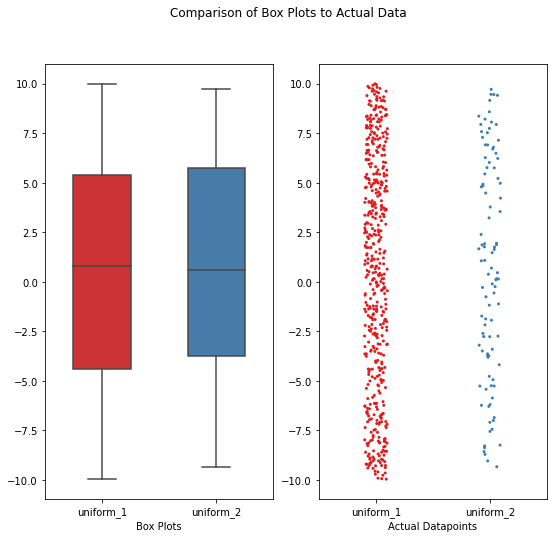

In [5]:
N1 = 500
N2 = 100
uniform_dist1 = np.random.uniform(low = -10, high = 10, size = N1)
uniform_dist2 = np.random.uniform(low = -10, high = 10, size = N2)


df = pd.DataFrame({'Value': np.concatenate([uniform_dist1, uniform_dist2])})
df['synthetic_dis'] = np.nan
df['synthetic_dis'][:N1] = 'uniform_1'
df['synthetic_dis'][N1:] = 'uniform_2'


fig, ax = plt.subplots(1, 2, figsize=(9,8))
sns.boxplot(data=df, x="synthetic_dis", y="Value", ax = ax[0], width = 0.5, palette="Set1")
sns.stripplot(data=df, x="synthetic_dis", y="Value", ax = ax[1], jitter = True, size = 3, alpha = 1, palette="Set1")

# Remove axis labels
for ax_i, label in zip(ax.flatten(), ['Box Plots', 'Actual Datapoints']):
    ax_i.set_xlabel(label)
    ax_i.set_ylabel('')    

fig.suptitle('Comparison of Box Plots to Actual Data');

### A better version of box plots

In the following figure, we start from a simple boxplot and add annotations to it with he number of observations for each group.

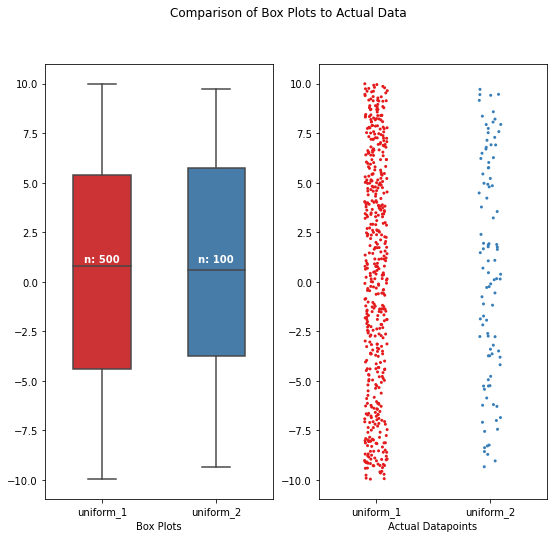

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(9,8))
sns.boxplot(data=df, x="synthetic_dis", y="Value", ax = ax[0], width = 0.5, palette="Set1")
sns.stripplot(data=df, x="synthetic_dis", y="Value", ax = ax[1], jitter = True, size = 3, alpha = 1, palette="Set1")

# Remove axis labels
for ax_i, label in zip(ax.flatten(), ['Box Plots', 'Actual Datapoints']):
    ax_i.set_xlabel(label)
    ax_i.set_ylabel('')    
fig.suptitle('Comparison of Box Plots to Actual Data');

# Calculate number of obs per group & median to position labels
medians = df.groupby(['synthetic_dis'])['Value'].median().values
nobs = df['synthetic_dis'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Adding text Labels
pos = range(len(nobs))
for tick,label in zip(pos,ax[0].get_xticklabels()):
    ax[0].text(pos[tick],
            1,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='w',
            weight='semibold')

plt.show()